**Método dos mínimos quadrados**

In [28]:
# Importar a biblioteca pasa uso de algoritmos matemáticos
import numpy as np

**Carregando valores do arquivo LTSpice**

In [29]:
# Ler o arquivo .txt e extrair uma coluna específica
id = np.loadtxt('RR601BGE4S.txt', delimiter='\t', usecols=(0,))
vd = np.loadtxt('RR601BGE4S.txt', delimiter='\t', usecols=(1,))

**Definindo X e Y**

In [30]:
log_id = np.log(id)
Xi=np.array(vd)
Yi=np.array(log_id)


**Gerando gráfico para observar se há um comportamento linear**

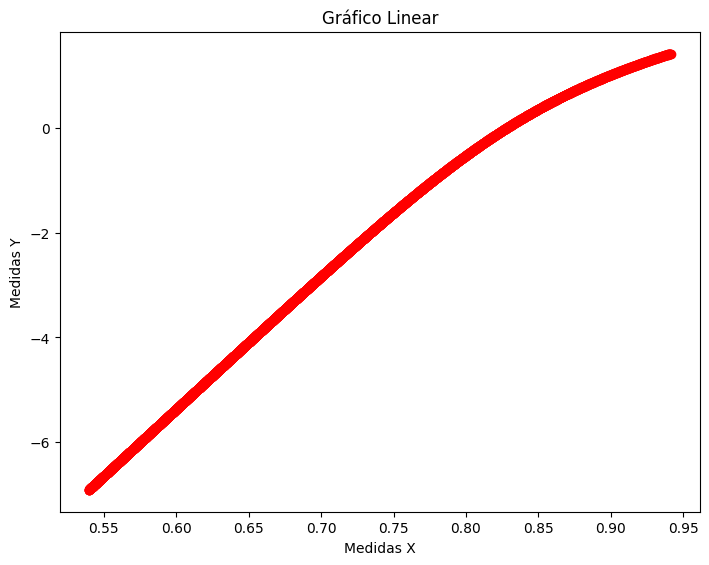

In [31]:
#Uma vez havendo um comportamento próximo ao linear pode aplicar-se o MMQ para ajuste linear
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Xi, Yi, color='r')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Medidas X')
ax.set_ylabel('Medidas Y')
ax.set_title('Gráfico Linear')
plt.show()

In [32]:
# Entendendo um comportamento próximo do linear aplica-se o MMQ

#n significa o número de medida das variáveis
n=len(log_id)

#Obtenção dos termos Xi^2 e Xi*Yi
Xi2=Xi**2
XiYi=Xi*Yi

#Cálculo dos coeficientes a e b pelo MMQ
a = (sum(Xi)*sum(Yi) -n*sum(XiYi))/(sum(Xi)**2 -n*sum(Xi2))
b = (sum(XiYi)*sum(Xi) - sum(Xi2)*sum(Yi))/(sum(Xi)**2 -n*sum(Xi2))
#print('O somatorio de X:',sum(Xi),"\n",'O somatorio de Y:',sum(Yi),"\n",'O somatorio de X*Y:',sum(XiYi),"\n",'O somatorio de X^2:',sum(Xi2),"\n")
print(f'O valor da constante A é: {a}',"\n",f'O valor da constante B é: {b}')

22.439341319830564
O valor da constante A é: 22.439341319830564 
 O valor da constante B é: -18.715253284998752


In [33]:
# Criar lista de valores ajustados
Ya=[]
for i in range(n):
  y= a*Xi[i] + b
  Ya.append(y)

**GRÁFICO AJUSTADO**

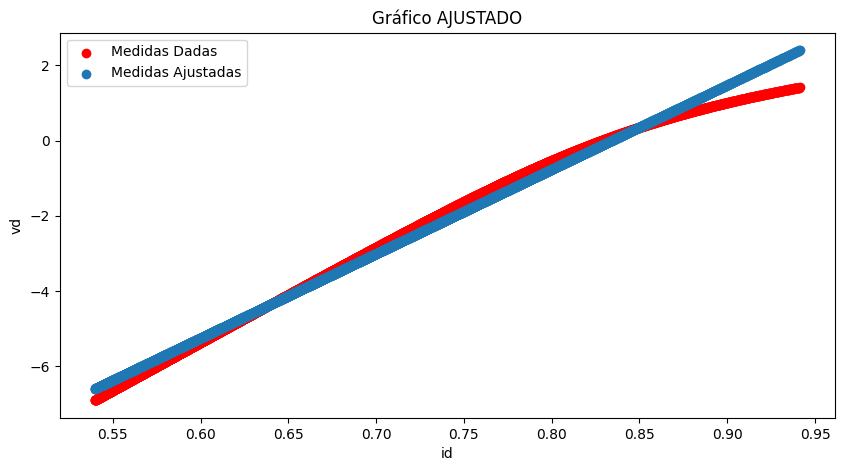

In [34]:
#Gerando o gráfico com as medidas e comparando com o ajuste
fig = plt.figure(figsize=(10,5)) 
plt.scatter(Xi, Yi, label = "Medidas Dadas", color='r')
plt.scatter(Xi, Ya, label = "Medidas Ajustadas")
plt.xlabel('id')
plt.ylabel('vd')
plt.title('Gráfico AJUSTADO')
plt.legend()  
plt.plot(Xi, Ya)
plt.show() 

**Descobrindo Is e N**

In [35]:
aphi = a * 0.026
n = 1/aphi
i_s =np.exp(b)
print(f"O valor de n é: {n}")
print(f"O valor de Is é: {i_s}")

O valor de n é: 1.714022613825497
O valor de Is é: 7.448499121897491e-09
